## Creating Functions

If we only had one data set to analyze,
it would probably be faster to load the file into a spreadsheet
and use that to plot some simple statistics.
But we have twelve files to check,
and may have more in future.
In this lesson,
we'll learn how to write a function
so that we can repeat several operations with a single command.

#### Objectives

*   Define a function that takes parameters.
*   Return a value from a function.
*   Test and debug a function.
*   Explain what a call stack is, and trace changes to the call stack as functions are called.
*   Set default values for function parameters.
*   Explain why we should divide programs into small, single-purpose functions.

### Defining a Function

Let's start by defining a function `fahr_to_kelvin` that converts temperatures from Fahrenheit to Kelvin.

The definition opens with the word `def`,
which is followed by the name of the function
and a parenthesized list of parameter names.
The [body](./gloss.html#function-body) of the function&mdash;the
statements that are executed when it runs&mdash;is indented below the definition line,
typically by four spaces.

When we call the function,
the values we pass to it are assigned to those variables
so that we can use them inside the function.
Inside the function,
we use a [return statement](./gloss.html#return-statement) to send a result back to whoever asked for it.


By the way in case you forgot the formula, here it is: $T_{(K)} = (T_{(°F)}-32) \times (5/9) + 273.15$

In [1]:
def fahr_to_kelvin(temp):
    return (temp - 32) * (5/9.0) + 273.15

Let's try running our function.
Calling our own function is no different from calling any other function:

In [2]:
print('freezing point of water:',fahr_to_kelvin(32))
print('boiling point of water:',fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


It works! (By the way, this simple program would have had a bug in Python 2, but we're using Python 3, so no worries. If you keep programming you'll have lots more opportunities to encounter bugs.)

### Composing Functions

Now that we've seen how to turn Fahrenheit into Kelvin,
it's easy to turn Kelvin into Celsius.  If you know the formula.  But that's simple, just subtract 273.15 from the temperature in Kelvin.

In [3]:
def kelvin_to_cel(kel_temp):
    return kel_temp - 273.15

What about converting Fahrenheit to Celsius?
We could write out the formula,
but we don't need to.
Instead,
we can [compose](./gloss.html#function-composition) the two functions we have already created:

In [4]:
def fahr_to_cel(temp):
    return kelvin_to_cel(fahr_to_kelvin(temp))

fahr_to_cel(32)

0.0

This is our first taste of how larger programs are built:
we define basic operations,
then combine them in ever-large chunks to get the effect we want.
Real-life functions will usually be larger than the ones shown here&mdash;typically half a dozen to a few dozen lines&mdash;but
they shouldn't ever be much longer than that,
or the next person who reads it won't be able to understand what's going on.

#### Challenges

1.  "Adding" two strings produces their concatention:
    `'a' + 'b'` is `'ab'`.
    Write a function called `fence` that takes two parameters called `original` and `wrapper`
    and returns a new string that has the wrapper character at the beginning and end of the original:

    ~~~python
    print(fence('name', '*'))
    *name*
    ~~~

1.  If the variable `s` refers to a string,
    then `s[0]` is the string's first character
    and `s[-1]` is its last.
    Write a function called `outer`
    that returns a string made up of just the first and last characters of its input:

    ~~~python
    print(outer('helium'))
    hm
    ~~~

In [5]:
# 1.
def concat(str1, str2):
    return str1 + str2
print(concat('a', 'b'))

def fence(original, wrapper):
    return wrapper + original + wrapper
print(fence('name', '*'))

# 2.
def outer(str):
    return str[0] + str[-1]
print(outer('helium'))

ab
*name*
hm


### Some thoughts on encapsulation

[Encapsulation](./gloss.html#encapsulation)
is the key to writing correct, comprehensible, programs.
A function's job is to turn several operations into one
so that we can think about a single function call
instead of a dozen or a hundred statements
each time we want to do something.
That only works if functions don't interfere with each other;
if they do,
we have to pay attention to the details once again,
which quickly overloads our short-term memory.

Let's take a closer look at what happens when we call `fahr_to_celsius(32.0)`.
To make things clearer,
we'll start by putting the initial value 32.0 in a variable
and store the final result in one as well:

In [6]:
original = 32.0
final = fahr_to_cel(original)

print('final value of temp after all function calls:', temp)

NameError: name 'temp' is not defined

If we try to get the value of `temp` after our functions have finished running,
Python tells us that there's no such thing.  Go ahead, try it.

In [7]:
original = 32.0
final = fahr_to_cel(original)

print('final value of temp after all function calls:', final)

final value of temp after all function calls: 0.0


Why go to all this trouble?
Well, now let's consider a function called `span` that calculates the difference between
the mininum and maximum values in an array.  You can write this using the functions we learned about in the previous notebook.  Rather than just returning the difference between the `max` and `min` directly, for the sake of argument, please assign it to a variable called `diff` and return that.  Oh, and don't forget to import the relevant library for working with arrays!

Once you've defined the function, load up our good old `inflammation-01.csv` data set and test it out.

In [13]:
import numpy as np

def span(a):
    diff = a.max() - a.min()
    return diff

data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

print('span of data:', span(data))

span of data: 20.0


But what would have happened if we decided, just to be annoying, to load the data file into a variable called `diff`?  Try it that way.

In [14]:
diff = np.loadtxt(fname='inflammation-01.csv', delimiter=',')
print('span of data:', diff)

span of data: [[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


No problem!  Did you think you'd see an error here?

This `diff` doesn't refer to the same thing as the one inside `span`.
Of course, we didn't *need* to use the name `diff` here, but the point is that we could get away with it.  The moral of the story is that functions shield their contents from the outside world.

#### Challenges

1.  We previously wrote functions called `fence` and `outer`.
    Draw a diagram showing how the call stack changes when we run the following:
    
    ~~~python
    print(outer(fence('carbon', '+')))
    ~~~

In [15]:
print(fence('carbon', '+'))
print(outer(fence('carbon', '+')))

+carbon+
++


### Testing and Documenting

Once we start putting things in functions so that we can re-use them,
we need to start testing that those functions are working correctly.
To see how to do this,
let's write a function to center a dataset around a particular value.
Thanks to operator overloading, you can do arithmetic that combines arrays and numbers and it will just work.  Hint: subtract the mean of the data to center around zero, then add the desired value to center around that.

In [16]:
def center(data, desired): # centered around the desired value
    return (data - data.mean()) + desired

We could test this on some of our actual data,
but since we don't know what the values ought to be,
it will be hard to tell if the result was correct.
Instead,
let's use NumPy to create a matrix of 0's
and then center that around 3.  Numpy has a method called `zeros` that will work for this.  It takes a two-tuple that specifies the dimensions of the matrix to fill with zeros.  Did you know you can also spell "zeros" as "zeroes"?   I can't promise you python would like the alternative spelling, however.

In [17]:
z = np.zeros((2,2)) #  a two-tuple that specifies the dimensions of the matrix to fill with zeros.
print("data:", z)
print("centered data:",center(z, 3))

data: [[ 0.  0.]
 [ 0.  0.]]
centered data: [[ 3.  3.]
 [ 3.  3.]]


That looks right,
so let's try `center` to center our data around `0`:

In [18]:
data = np.loadtxt(fname='inflammation-01.csv', delimiter=',')

print(data)
print(data.mean())
centered = center(data, 0)
centered

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]
6.14875


array([[-6.14875, -6.14875, -5.14875, ..., -3.14875, -6.14875, -6.14875],
       [-6.14875, -5.14875, -4.14875, ..., -5.14875, -6.14875, -5.14875],
       [-6.14875, -5.14875, -5.14875, ..., -4.14875, -5.14875, -5.14875],
       ..., 
       [-6.14875, -5.14875, -5.14875, ..., -5.14875, -5.14875, -5.14875],
       [-6.14875, -6.14875, -6.14875, ..., -6.14875, -4.14875, -6.14875],
       [-6.14875, -6.14875, -5.14875, ..., -5.14875, -5.14875, -6.14875]])

It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that could reassure us.  Let's compare the `min`, `mean`, and `max` of the original data and the new centered data.

In [19]:
print('original min, mean, and max are: {}, {}, {}'.format(data.min(), data.mean(), data.max()))

print('centered min, mean, and max are: {}, {}, {}'.format(centered.min(), centered.mean(), centered.max()))

original min, mean, and max are: 0.0, 6.14875, 20.0
centered min, mean, and max are: -6.14875, 2.842170943040401e-16, 13.85125


It looks like the original `mean` was about `6.1`, while the original `min` was `0`.
So, it makes sense that the original `mean` becomes the centred `min`.
The mean of the centered data isn't *quite* zero&mdash;we'll explore why not in the challenges&mdash;but it is really close.
We can take the check one step further and see that the standard deviation hasn't changed:

In [20]:
print('original std is: {}'.format(data.std()))
print('centered std is: {}'.format(centered.std()))

original std is: 4.613833197118566
centered std is: 4.613833197118566


Those values look the same,
but we probably wouldn't notice if they were different in the sixth decimal place.
Let's print their difference instead:

In [21]:
data.std() - centered.std()

0.0

Again,
the difference is very small, if not exactly zero :-)

Perhaps our function is wrong,
but it seems unlikely, so we should probably get back to doing our analysis.

We have one more task first, though:
we should write some [documentation](./gloss.html#documentation) for our function
to remind ourselves later what it's for and how to use it.

One way to put documentation in software is to add [comments](./gloss.html#comment).  In Python, comments begin with a `#` symbol (sometimes referred to as an "octothorpe", commonly known as a "hash").  Try redefining the function with some commented documentation now.

In [22]:
# center(data, desired): return a new array
# containing the original data (ndarray) centered around the desired value (int/float)
def center(data, desired):
    return (data - data.mean()) + desired


There's a better way, though.
If the first "thing" in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation.  Try defining the function that way.

In [23]:
def center(data, desired):
    '''
    center(data, desired): return a new array
    containing the original data (ndarray) centered around the desired value (int/float)
    '''
    return (data - data.mean()) + desired

This is better because we can now ask Python's built-in help system to show us the documentation for the function:

In [24]:
help(center)

Help on function center in module __main__:

center(data, desired)
    center(data, desired): return a new array
    containing the original data (ndarray) centered around the desired value (int/float)



A string like the one we've created is called a [docstring](./gloss.html#docstring).
If we write the string with **triple quotes**, then we're allowed to have it span multiple lines.  Try that now, and include an example in the docstring.  Call the `help` function again to inspect the results of your efforts.

In [25]:
def center(data, desired):
    '''
    Return a new array
    containing the original data (ndarray) centered around the desired value (int/float)
    Example: center([1, 2, 3], 0) => [-1, 0, 1]
    '''
    return (data - data.mean()) + desired

help(center)


Help on function center in module __main__:

center(data, desired)
    Return a new array
    containing the original data (ndarray) centered around the desired value (int/float)
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



#### Challenges

1.  Write a function called `analyze` that takes a filename as a parameter
    and displays the three graphs produced in the [previous lesson](01-numpy.ipynb),
    i.e.,
    `analyze('inflammation-01.csv')` should produce the graphs already shown,
    while `analyze('inflammation-02.csv')` should produce corresponding graphs for the second data set.
    Be sure to give your function a docstring.

2.  Write a function `rescale` that takes an array as input
    and returns a corresponding array of values scaled to lie in the range 0.0 to 1.0.
    (If $L$ and $H$ are the lowest and highest values in the original array,
    then the replacement for a value $v$ should be $(v-L) / (H-L)$.)
    Be sure to give the function a docstring.

3.  Run the commands `help(numpy.arange)` and `help(numpy.linspace)`
    to see how to use these functions to generate regularly-spaced values,
    then use those values to test your `rescale` function.

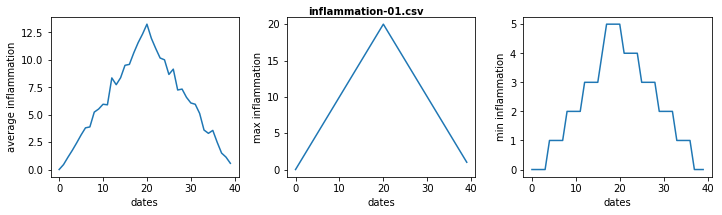

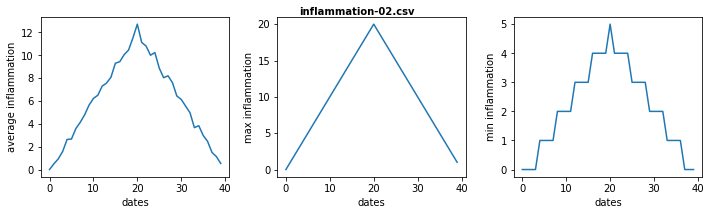

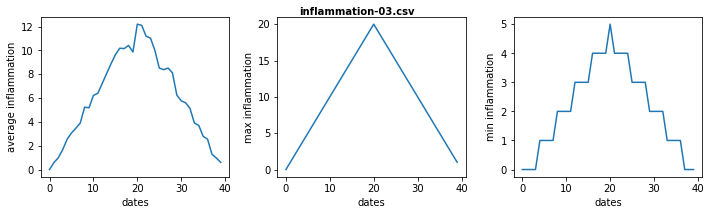

In [34]:
def analyze(fname):
    """
    Show plots of average, max and min values of all patients across 40 days
    Given a specified file dataset (file name of a csv file)
    Example:
    analyze("inflammation-01.csv") ->  plots a figure of average, max and min of "inflammation-01.csv" dataset
    """
    import matplotlib.pyplot as plt
    data = np.loadtxt(fname, delimiter = ",")

    # a good size for the figure is 10 by 3, which is width by height
    # http://matplotlib.org/2.0.0b3/users/text_intro.html
    # create a figure
    fig = plt.figure(figsize=(10, 3)) # width 10 by height 3 in inches
    fig.suptitle(fname, fontsize=10, fontweight='bold') # add filename to associated graphes

    # https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.subplots.html
    plt.subplot(1, 3, 1) # rows, cols, sub fignum
    plt.xlabel("dates")
    plt.ylabel("average inflammation")
    plt.plot(data.mean(0)) # data.mean(0) <-> data.mean(axis=0) for 40 days

    plt.subplot(1, 3, 2)
    plt.xlabel("dates") # plt remembers state of figure, so must subplot before labelling
    plt.ylabel("max inflammation")
    plt.plot(data.max(0))

    plt.subplot(1, 3, 3)
    plt.xlabel("dates")
    plt.ylabel("min inflammation")
    plt.plot(data.min(0))

    plt.tight_layout()
    plt.show()
    
analyze("inflammation-01.csv")
analyze("inflammation-02.csv")
analyze("inflammation-03.csv")

In [62]:
def rescale(ndarray):
    """
    Return a new ndarray which values of original ndarray scaled to lie in the range 0.0 to 1.0
    Example:
    rescaled([ 1.  2.  3.  4.  5.]) -> [ 0.    0.25  0.5   0.75  1.  ]
    """
    l = ndarray.min()
    h = ndarray.max()
    rescale_func = lambda v: (v - l) / (h - l)
    vfunc = np.vectorize(rescale_func) #vectorize functions
    return vfunc(ndarray)

# help(np.arange)
test_data_1 = np.arange(0, 20, 2)
# help (np.linspace)
test_data_2 = np.linspace(1.0, 5.0, num=5)
print("test1:", test_data_1)
print("rescaled test1", rescale(test_data_1))
print("test2:",test_data_2)
print("rescaled test2", rescale(test_data_2))

test1: [ 0  2  4  6  8 10 12 14 16 18]
rescaled test1 [ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
test2: [ 1.  2.  3.  4.  5.]
rescaled test2 [ 0.    0.25  0.5   0.75  1.  ]


### Defining Defaults

We have passed parameters to functions in two ways:
directly, as in `span(data)`,
and by name, as in `numpy.loadtxt(fname='something.csv', delimiter=',')`.
In fact, if you haven't noticed this already, you'll be interested to know that
we can pass the filename to `loadtxt` without the `fname=`:

In [37]:
np.loadtxt('inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

but we still need to specify the `delimiter=`, or we get an error.  Go ahead and try that.

In [38]:
help(np.loadtxt)
np.loadtxt('inflammation-01.csv', ',')

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list o

TypeError: data type "," not understood

To understand what's going on,
and make our own functions easier to use,
let's re-define our `center` function so that the second parameter, `desired`, has a default value of 0.

In [39]:
def center(data, desired=0):
    '''
    return a new array
    containing the original data (ndarray) centered around the desired value (0 by default)(int/float)
    Example: center([1, 2, 3], 0) => [-1, 0, 1]
    '''
    return (data - data.mean()) + desired

Now, if we call the function with two arguments,
it works as it did before:

In [40]:
test_data = np.zeros((2, 2))
print(center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


But we can also now call it with just one parameter,
in which case `desired` is automatically assigned the [default value](./gloss.html#default-parameter-value) of 0.0:

In [41]:
test_data = np.zeros((2, 2))
print(center(test_data))

[[ 0.  0.]
 [ 0.  0.]]


This is handy:
if we usually want a function to work one way,
but occasionally need it to do something else,
we can allow people to pass a parameter when they need to
but provide a default to make the normal case easier.
Can you create some test data that will show how the default behavior works?

In [42]:
more_data = 5 + np.zeros((2, 2)) # yes, we can do this to add all elements by 5

print('centered data:', center(more_data)) # std has not changed

centered data: [[ 0.  0.]
 [ 0.  0.]]


The parameters are matched up from left to right,
and any that haven't been given a value explicitly get their default value.
Now override the default behavior by specifying a particular value when you call the function.

In [43]:
print('centered data:', center(more_data, 5))

centered data: [[ 5.  5.]
 [ 5.  5.]]


With these concepts in hand,
let's look at the help for `numpy.loadtxt`:

In [44]:
# see below

There's a lot of information here,
but the most important part is the first couple of lines:

~~~python
loadtxt(fname, dtype=<type 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None,
        unpack=False, ndmin=0)
~~~

This tells us that `loadtxt` has one parameter called `fname` that doesn't have a default value,
and eight others that do.
If we call the function like this:

~~~python
numpy.loadtxt('inflammation-01.csv', ',')
~~~

then the filename is assigned to `fname` (which is what we want),
but the delimiter string `','` is assigned to `dtype` rather than `delimiter`,
because `dtype` is the second parameter in the list.
That's why we don't have to provide `fname=` for the filename,
but *do* have to provide `delimiter=` for the second parameter.

### Debugging a program

Perhaps you're sad that we didn't get to see the Python 2 bug that was mentioned way back at the beginning of this file.  Well to make up for that, here's another program with a bug in it.

``` python
def foo(bar=[]):           # bar is optional and defaults to [] if not specified
       bar.append("baz")
       return bar
```

How do you expect the function to work?  Do you want to give it a try?  Go ahead and enter the definition here, and then test it out a bit.

In [47]:
def foo(bar=[]):
    bar.append("baz!")
    return bar

print(foo()) # ['baz!']
print(foo()) # ['baz!', 'baz!']

['baz!']
['baz!', 'baz!']


Did that go as expected?  Will it work the same way every time?  Go on, give it another try.

In [49]:
print(foo()) # ['baz!', 'baz!', 'baz!']
print(foo())
print(foo())

['baz!', 'baz!', 'baz!', 'baz!']
['baz!', 'baz!', 'baz!', 'baz!', 'baz!']
['baz!', 'baz!', 'baz!', 'baz!', 'baz!', 'baz!']


Well, it sort of works the same way every time, but this probably isn't what you were expecting.  Can you fix it?  Hint: **the default value for a function argument is only evaluated once, at the time that the function is defined.**  Another hint: try using the default setting `bar=None` this time.  You will need an `if` statement.  But if you're not familiar with `if`, don't worry, we will have more practice with `if` statements in another notebook later on, and you can come back and finish this exercise later.

In [59]:
def foo(bar=None):
    if bar is None: # is None (None object), not ==
        bar = []
    bar.append("baz!")
    return bar

print(foo())
print(foo())
print(foo())

# Note: default value created in the first call!
# keeping in mind the default value for a function argument is only evaluated once
# at the time that the function is defined.

['baz!']
['baz!']
['baz!']


#### Challenges

1.  Rewrite the `rescale` function so that it scales data to lie between 0.0 and 1.0 by default,
    but will allow the caller to specify lower and upper bounds if they want.
    Compare your implementation to your neighbor's:
    do the two functions always behave the same way?

In [71]:
def rescale(ndarray, l_bound=None, up_bound=None):
    """
    Return a new ndarray which values of original ndarray scaled to lie in the arbitrary range,
    0.0 to 1.0 by default
    Example:
    rescaled([ 1.  2.  3.  4.  5.]) -> [ 0.    0.25  0.5   0.75  1.  ]
    """
    l = ndarray.min()
    h = ndarray.max()
    if l_bound or up_bound is None: # use or, not and
        rescale_func = lambda v: (v - l) / (h - l)
    else:
        print("---")
        rescale_func = lambda v: ((v - l) * (up_bound - l_bound) / (h - l)) + l_bound
    vfunc = np.vectorize(rescale_func) #vectorize functions
    return vfunc(ndarray)


test_data_1 = np.arange(0, 20, 2)
print("test1 data:", test_data_1)
print("rescaled test1 data:", rescale(test_data_1))

test_data_2 = np.linspace(1.0, 5.0, num=5)
print("test2 data:", test_data_2)
print("rescaled test2 data:", rescale(test_data_2))



test1 data: [ 0  2  4  6  8 10 12 14 16 18]
rescaled test1 data: [ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
test2 data: [ 1.  2.  3.  4.  5.]
rescaled test2 data: [ 0.    0.25  0.5   0.75  1.  ]


#### Key Points

*   Define a function using `def name(...params...)`.
*   The body of a function must be indented.
*   Call a function using `name(...values...)`.
*   Functions can be composed.
*   Here's the technical idea behind encapsulation: each time a function is called, a new stack frame is created on the [call stack](./gloss.html#call-stack) to hold its parameters and local variables.
 *   Python then looks for variables in the current stack frame before looking for them at the top level.
*   Use `help(thing)` to view help for something.
*   Put docstrings in functions to provide help for that function.
*   Specify default values for parameters when defining a function using `name=value` in the parameter list.
*   Parameters can be passed by matching based on name, by position, or by omitting them (in which case the default value is used).
 * Be careful with defaults, keeping in mind the default value for a function argument is only evaluated once, at the time that the function is defined.

#### Next Steps

We now have a function called `analyze` to visualize a single data set.
We could use it to explore all 12 of our current data sets like this:

~~~python
analyze('inflammation-01.csv')
analyze('inflammation-02.csv')
...
analyze('inflammation-12.csv')
~~~

but the chances of us typing all 12 filenames correctly aren't great,
and we'll be even worse off if we get another hundred files.
What we need is a way to tell Python to do something once for each file,
and that will be the subject of the next lesson.